# MNIST 

The 'FASHION MNIST' database of fashion products, has a training set of 60,000 examples, and a test set of 10,000 examples. The images have been size-normalized and centered to a fixed-size 28x28 resolution. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

In [1]:
# Importing required libraries 
import numpy as np
import pandas as pd

In [4]:
train = pd.read_csv('fashionmnist/fashion-mnist_train.csv')
test = pd.read_csv('fashionmnist/fashion-mnist_test.csv')

train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
X_train = np.array(train.iloc[:,1:])
y_train = np.array(train.iloc[:,0])

X_test = np.array(test.iloc[:,1:])
y_test = np.array(test.iloc[:,0])

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


[34428 58793 16432 30657 22097  8224 19094 51369 40046 39021]


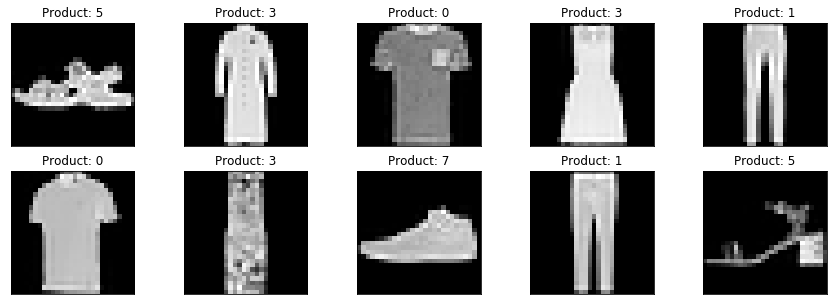

In [6]:
import matplotlib.pyplot as plt    # For plotting 
%matplotlib inline                 

s = np.random.choice(range(X_train.shape[0]), size=10, replace=False)  # Randomly select few samples

print(s)
plt.figure(figsize=(15,5))
for i,j in enumerate(s):   
    plt.subplot(2,5,i+1)                                # Subplot flag
    plt.imshow(np.array(X_train[j]).reshape(28,28))     # Plot the image
    plt.title('Product: '+str(y_train[j]))              # Target of the image
    plt.xticks([])                                      # No X-Axis ticks
    plt.yticks([])                                      # No Y-Axis ticks
    plt.gray()                                          # For gray scale images 

In [15]:
# Check the dimensions of the arrays
print('x_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('x_test shape:  {}'.format(X_test.shape))
print('y_test shape:  {}'.format(y_test.shape))

x_train shape: (60000, 784)
y_train shape: (60000, 10)
x_test shape:  (10000, 784)
y_test shape:  (10000, 10)


In [32]:
# 'to_categorical' converts the class lebels to one-hot vectors. One-hot vector is nothing but dummifying in R.
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.]])

In [52]:
# Sequential is a container which stores the layers in order. 
# Think of it as a train engine to which you can keep adding train cars. train car in our context will be a layer.
# 'Dense' is a fully connected layer feedforward layer.
from keras.models import Sequential 
from keras.layers import Dense

In [63]:
# Building a simple MLP

model = Sequential() # This initializes a sequential model to which we can keep adding layers.
model.add(Dense(200, kernel_initializer='uniform', input_dim = 784, activation='relu')) # Add a dense layer 
model.add(Dense(10, kernel_initializer='uniform', activation='softmax')) # Add output layer

In [64]:
# Setting learning and momentum
# Adam is the optimizer which is the state of the art Gradient Descent variation. 
from keras.optimizers import Adam
adam = Adam(lr=0.001)

model.compile(loss='categorical_crossentropy', # CrossEntropy is the loss function. 
              optimizer=adam,                  # Mention the optimizer
              metrics=['accuracy'])            # Mention the metric to be printed while training

In [65]:
nb_epochs = 600
# training the MLP model
history = model.fit(X_train, y_train, epochs=nb_epochs, batch_size=128, validation_split=0.1) 

Train on 54000 samples, validate on 6000 samples
Epoch 1/600
54000/54000 [==============================] - 3s - loss: 11.5918 - acc: 0.2760 - val_loss: 11.5761 - val_acc: 0.2798
Epoch 2/600
54000/54000 [==============================] - 3s - loss: 11.4364 - acc: 0.2885 - val_loss: 11.4742 - val_acc: 0.2863
Epoch 3/600
54000/54000 [==============================] - 3s - loss: 10.8820 - acc: 0.3221 - val_loss: 10.2985 - val_acc: 0.3588
Epoch 4/600
54000/54000 [==============================] - 3s - loss: 9.9969 - acc: 0.3777 - val_loss: 10.0051 - val_acc: 0.3775
Epoch 5/600
54000/54000 [==============================] - 3s - loss: 9.9727 - acc: 0.3791 - val_loss: 9.9798 - val_acc: 0.3782
Epoch 6/600
54000/54000 [==============================] - 3s - loss: 9.7071 - acc: 0.3928 - val_loss: 8.6054 - val_acc: 0.4577
Epoch 7/600
54000/54000 [==============================] - 3s - loss: 8.4198 - acc: 0.4633 - val_loss: 8.3992 - val_acc: 0.4630
Epoch 8/600
54000/54000 [=======================

54000/54000 [==============================] - 3s - loss: 0.3331 - acc: 0.8826 - val_loss: 0.5421 - val_acc: 0.8487
Epoch 128/600
54000/54000 [==============================] - 2s - loss: 0.3332 - acc: 0.8818 - val_loss: 0.5725 - val_acc: 0.8383
Epoch 129/600
54000/54000 [==============================] - 3s - loss: 0.3264 - acc: 0.8838 - val_loss: 0.5432 - val_acc: 0.8512
Epoch 130/600
54000/54000 [==============================] - 3s - loss: 0.3217 - acc: 0.8852 - val_loss: 0.5671 - val_acc: 0.8445
Epoch 131/600
54000/54000 [==============================] - 2s - loss: 0.3222 - acc: 0.8869 - val_loss: 0.5617 - val_acc: 0.8445
Epoch 132/600
54000/54000 [==============================] - 2s - loss: 0.3326 - acc: 0.8825 - val_loss: 0.6004 - val_acc: 0.8467
Epoch 133/600
54000/54000 [==============================] - 3s - loss: 0.3313 - acc: 0.8832 - val_loss: 0.5424 - val_acc: 0.8562
Epoch 134/600
54000/54000 [==============================] - 3s - loss: 0.3230 - acc: 0.8871 - val_loss:

54000/54000 [==============================] - 3s - loss: 0.3164 - acc: 0.8888 - val_loss: 0.6037 - val_acc: 0.8430
Epoch 252/600
54000/54000 [==============================] - 3s - loss: 0.3154 - acc: 0.8876 - val_loss: 0.6322 - val_acc: 0.8522
Epoch 253/600
54000/54000 [==============================] - 2s - loss: 0.3172 - acc: 0.8875 - val_loss: 0.6545 - val_acc: 0.8440
Epoch 254/600
54000/54000 [==============================] - 3s - loss: 0.3138 - acc: 0.8888 - val_loss: 0.5982 - val_acc: 0.8502
Epoch 255/600
54000/54000 [==============================] - 3s - loss: 0.3134 - acc: 0.8894 - val_loss: 0.6145 - val_acc: 0.8498
Epoch 256/600
54000/54000 [==============================] - 3s - loss: 0.3105 - acc: 0.8896 - val_loss: 0.6146 - val_acc: 0.8437
Epoch 257/600
54000/54000 [==============================] - 3s - loss: 0.3348 - acc: 0.8823 - val_loss: 0.6310 - val_acc: 0.8477
Epoch 258/600
54000/54000 [==============================] - 3s - loss: 0.3135 - acc: 0.8889 - val_loss:

54000/54000 [==============================] - 2s - loss: 0.3043 - acc: 0.8924 - val_loss: 0.6628 - val_acc: 0.8410
Epoch 378/600
54000/54000 [==============================] - 2s - loss: 0.3028 - acc: 0.8946 - val_loss: 0.6523 - val_acc: 0.8428
Epoch 379/600
54000/54000 [==============================] - 3s - loss: 0.3048 - acc: 0.8931 - val_loss: 0.6505 - val_acc: 0.8493
Epoch 380/600
54000/54000 [==============================] - 3s - loss: 0.2966 - acc: 0.8939 - val_loss: 0.6685 - val_acc: 0.8488
Epoch 381/600
54000/54000 [==============================] - 3s - loss: 0.2974 - acc: 0.8939 - val_loss: 0.6259 - val_acc: 0.8465
Epoch 382/600
54000/54000 [==============================] - 3s - loss: 0.2973 - acc: 0.8935 - val_loss: 0.6760 - val_acc: 0.8452
Epoch 383/600
54000/54000 [==============================] - 3s - loss: 0.2919 - acc: 0.8939 - val_loss: 0.6813 - val_acc: 0.8405
Epoch 384/600
54000/54000 [==============================] - 3s - loss: 0.3007 - acc: 0.8927 - val_loss:

54000/54000 [==============================] - 3s - loss: 0.2893 - acc: 0.8959 - val_loss: 0.7242 - val_acc: 0.8375
Epoch 504/600
54000/54000 [==============================] - 3s - loss: 0.2892 - acc: 0.8956 - val_loss: 0.6700 - val_acc: 0.8455
Epoch 505/600
54000/54000 [==============================] - 3s - loss: 0.3118 - acc: 0.8930 - val_loss: 0.6952 - val_acc: 0.8410
Epoch 506/600
54000/54000 [==============================] - 3s - loss: 0.3024 - acc: 0.8935 - val_loss: 0.6746 - val_acc: 0.8490
Epoch 507/600
54000/54000 [==============================] - 3s - loss: 0.3054 - acc: 0.8935 - val_loss: 0.6901 - val_acc: 0.8480
Epoch 508/600
54000/54000 [==============================] - 3s - loss: 0.2997 - acc: 0.8944 - val_loss: 0.7180 - val_acc: 0.8490
Epoch 509/600
54000/54000 [==============================] - 3s - loss: 0.2858 - acc: 0.8981 - val_loss: 0.6926 - val_acc: 0.8460
Epoch 510/600
54000/54000 [==============================] - 3s - loss: 0.2932 - acc: 0.8948 - val_loss:

In [18]:
train_acc = history.history['acc']
train_loss = history.history['loss']

val_acc = history.history['val_acc']
val_loss = history.history['val_loss']

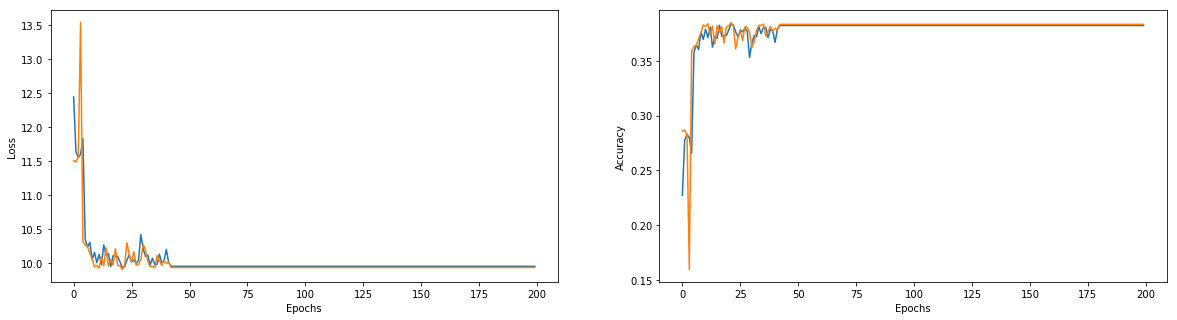

In [19]:
from matplotlib import pyplot as plt #plt is a visualization module in matplotlib.  
%matplotlib inline 
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(train_loss)
plt.plot(val_loss)

plt.subplot(1,2,2)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(train_acc)
plt.plot(val_acc)

### Activity

1. Get the output of final layer on test data. What are it's dimensions? What do those values represent?

2. Get the class predictions for test data

3. Compute the Accuracy of the model on test data

HINT: Check model.predict, model.predict_classes, model.evaluate 

### Activity

1. Note down the accuracies for various number of nodes if the hidden layer and make a plot for the same

2. Note down the accuracies for various learning rate values make a plot for the same

HINT: Please check the plotting code above and explore matplotlib further if needed. Don't be afraid to explore on your own if needed and don't restrict yourself only to the material given in class. 

In [ ]:
# Psuedocode
# Hidden Nodes Vs. Accuracy
hidden_list = []
acc_list = []
for l in hidden_list:
    # Train the model for these hidden nodes
    # Evaluate the model on test data
    # Append the accuracy on test data to 'acc_list'

# Plot values in hidden_list Vs. values in 'acc_list'
# Name the plot accordingly and label the axis properly

In [ ]:
# Psuedocode
# Learning Rate Vs. Accuracy
lr_list = []
acc_list = []
for l in lr_list:
    # Train the model for this learning rate
    # Evaluate the model on test data
    # Append the accuracy on test data to 'acc_list'

# Plot values in lr_list Vs. values in 'acc_list'
# Name the plot accordingly and label the axis properly